In [5]:
j = 1;
d = 20;

# Initialize the iteration counter of the chain j = 1 and set initial values
#  theta_0 = (theta_1_0, theta_2_0, .... , theta_d_0)'

import random
import numpy as np

theta_0 = np.random.random(d)
theta_0

# Obtain a new value theta_j = (theta_1_j, theat)

array([0.19925024, 0.59281474, 0.66404158, 0.03949933, 0.38725716,
       0.02661325, 0.92698894, 0.94902062, 0.06337516, 0.18325765,
       0.94687112, 0.32489039, 0.97520907, 0.21453146, 0.61862451,
       0.04594349, 0.5390247 , 0.44668097, 0.52443306, 0.97013913])

## Algorithm

1. Initialize (x_0, y_0) and set time n or t = 0
2. Draw x_t from conditional distribution
      X_t|(Y_t-1 = y_t ~ N(rho_y_t-1, 1 - rho^2))
3. Draw y_t from conditional distribution
      y_t|(x_t = x_t ~ N(rho_x_t, 1 - rho^2))
4. Increase t = t+1
5. return to step 2

In [72]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(23)

def x_1(y_0, rho):
    return np.random.normal(rho*(y_0), 1 - rho**2) # using standard normal distribution to get multivarite distribution.

def y_1(x_1, rho):
    return np.random.normal(rho*(x_1), 1- rho**2) # using standard normal distribution to get multivariate distribution.

def gibbs_sampling(rho) :

    t = 0
    error = 0.001
    N = 100000 # Take large sample
    x = [float(0)]
    y = [float(0)]

    while 1:
        x_t = x_1(y[t],rho=rho)
        x.append(x_t)
        y_t = y_1(x[t+1],rho=rho)
        y.append(y_t)

        if abs(y[t-1] - y[t]) < error and abs(x[t-1] - x[t]) < error: 
            print(f"Number of steps: {t}")
            break
        t = t + 1

    plt.scatter(x,y)
    plt.title(f"Scatter plot for Gibbs sampling with rho = {rho}")
    plt.show()

Number of steps: 124251


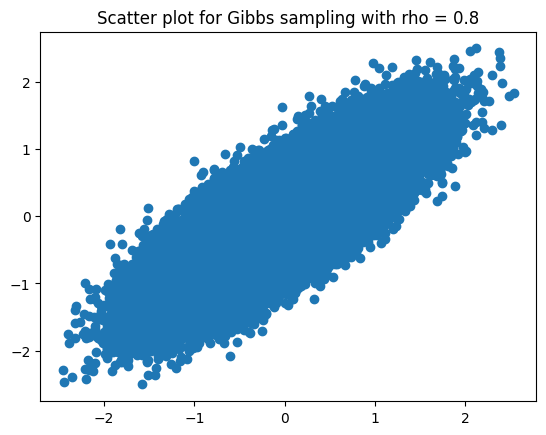

In [73]:
# rho = 0.8
gibbs_sampling(rho=0.8)

Number of steps: 4568089


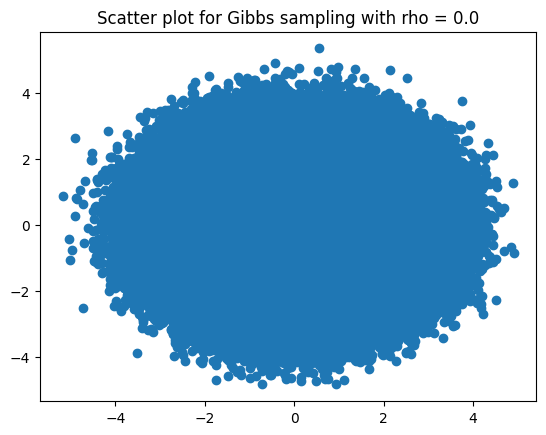

Number of steps: 7490800


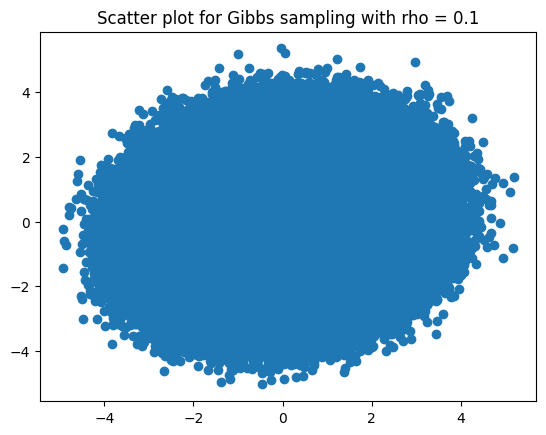

Number of steps: 1588515


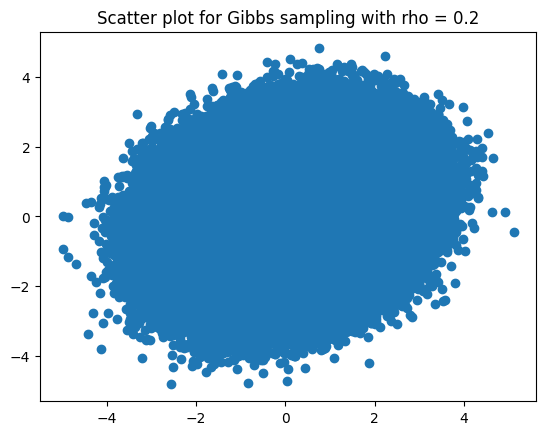

Number of steps: 2759272


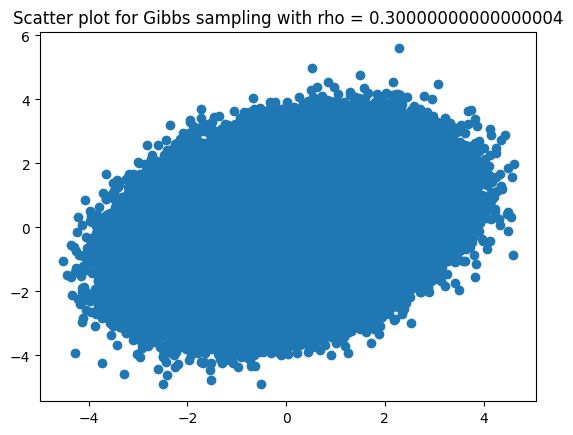

Number of steps: 7343805


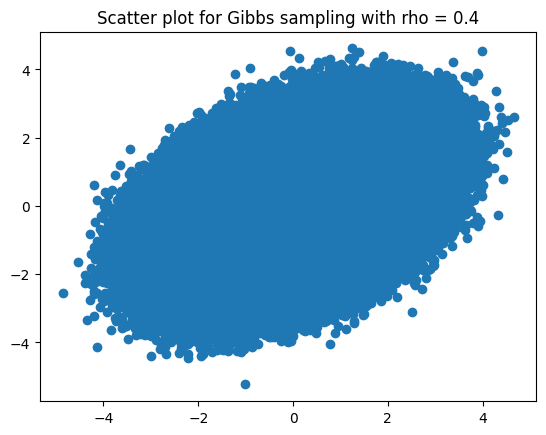

Number of steps: 1353371


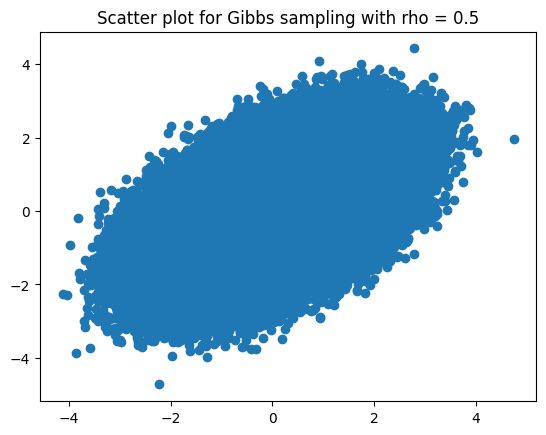

Number of steps: 1954362


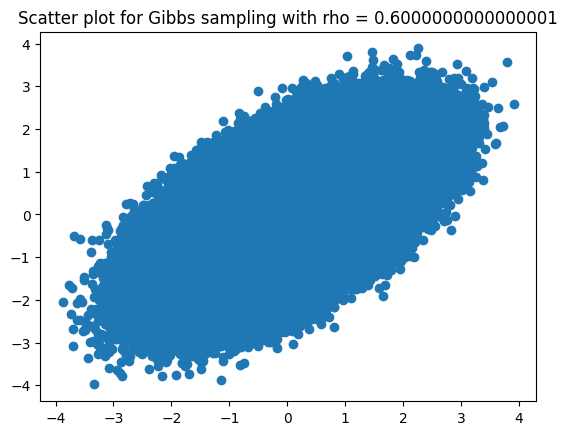

Number of steps: 3333923


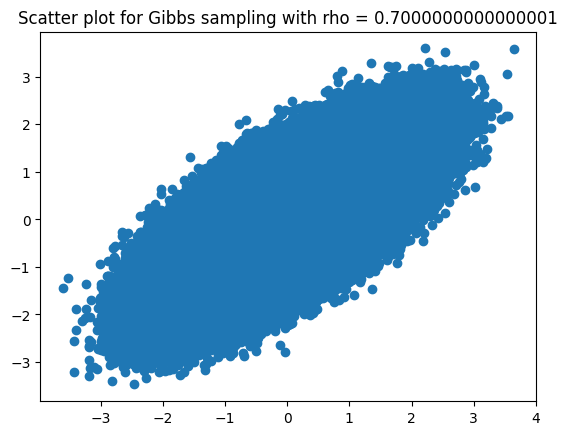

Number of steps: 455396


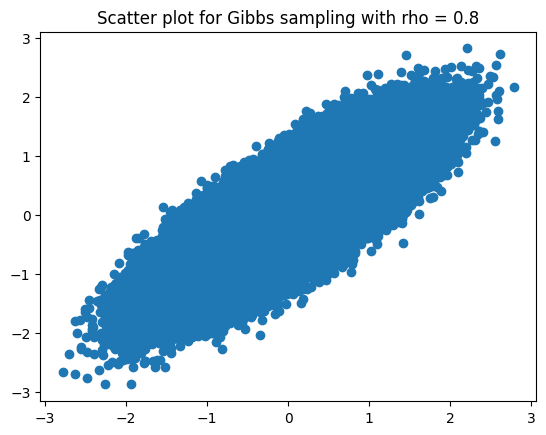

Number of steps: 14191


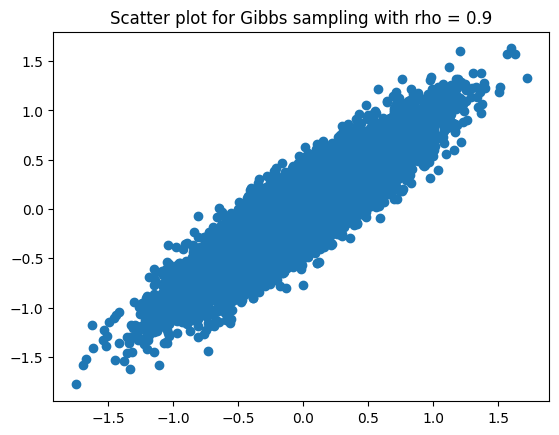

Number of steps: 0


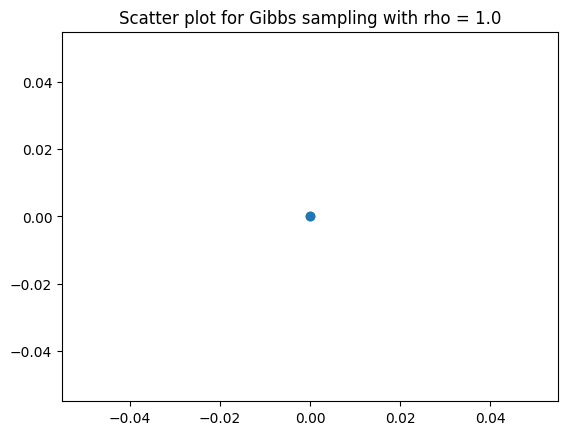

In [74]:
val = np.linspace(0,1,num=11)
for n in val:
    gibbs_sampling(rho=n)